# Preprocessing

This code is a simple example of using the `librosa` library to load an audio file and display its waveform using `matplotlib`. Here's a breakdown of what each part of the code does:

1. **Imports**:
   - `librosa` is used for audio analysis and processing.
   - `matplotlib.pyplot` is used for plotting graphs.
   - `numpy` is used for numerical operations, although it's not directly used in this snippet.

2. **Loading the audio file**:
   - `signal, sr = librosa.load(file, sr=22050)` loads the audio file `"blues.wav"` with a sampling rate of 22050 Hz. The `librosa.load` function returns the audio signal as a numpy array (`signal`) and the sampling rate (`sr`).

3. **Plotting the waveform**:
   - `librosa.display.waveshow(signal, sr=sr)` is used to plot the waveform of the audio signal. The x-axis represents time, and the y-axis represents the amplitude of the audio signal.
   - `plt.xlabel("Time")` and `plt.ylabel("Amplitude")` label the x-axis and y-axis respectively.
   - `plt.show()` displays the plot.

Overall, this code demonstrates how to load an audio file and visualize its waveform using `librosa` and `matplotlib`.


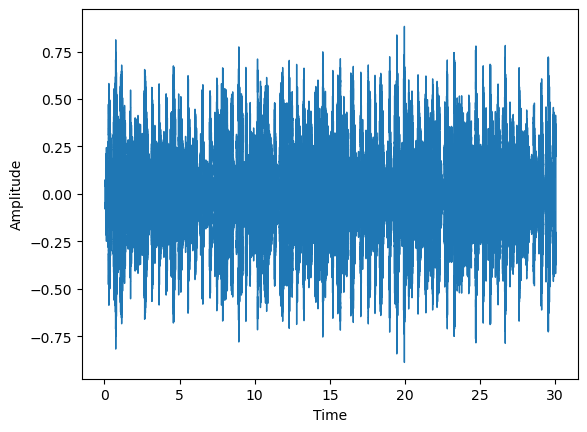

In [29]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

file = "blues.wav"

#waveform
signal, sr = librosa.load(file, sr=22050) # sr*T -> 22050*30
librosa.display.waveshow(signal, sr=sr)

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

This code demonstrates how to perform a Fast Fourier Transform (FFT) on an audio signal and plot its spectrum using NumPy and Matplotlib. Here's a breakdown of what each part of the code does:

1. **FFT Transformation**:
   - `fft = np.fft.fft(signal)` performs the Fast Fourier Transform on the audio signal. The FFT converts the time-domain signal into its frequency-domain representation.

2. **Magnitude and Frequency**:
   - `magnitude = np.abs(fft)` calculates the magnitude of the FFT, which represents the amplitude of each frequency component in the signal.
   - `frequency = np.linspace(0, sr, len(magnitude))` creates an array of frequency values ranging from 0 to the sampling rate (`sr`). The length of this array is the same as the length of the `magnitude` array.

3. **Plotting the Spectrum**:
   - `plt.plot(frequency, magnitude)` plots the magnitude of the FFT against the frequency. This graph is known as the spectrum of the signal, which shows how the signal's energy is distributed across different frequencies.
   - `plt.xlabel("frequency")` and `plt.ylabel("Amplitude")` label the x-axis and y-axis respectively.
   - `plt.show()` displays the plot.

Overall, this code demonstrates how to analyze the frequency content of an audio signal using the FFT and visualize its spectrum.


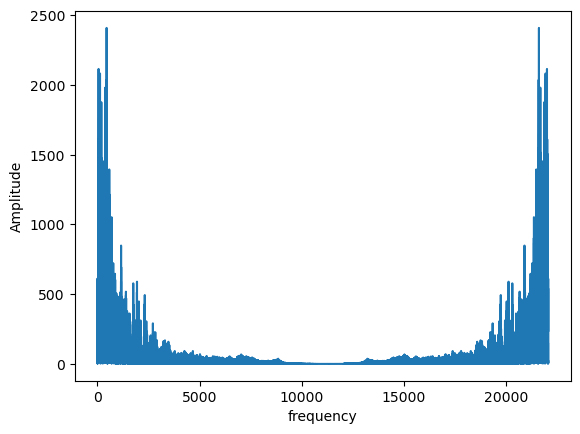

In [30]:
# fft -> Spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.show()

This code modifies the previous spectrum plot to display only the left half of the spectrum, which is the meaningful part for most real-world signals. Here's a breakdown of what each part of the code does:

1. **Selecting Half of the Spectrum**:
   - `left_frequency = frequency[:int(len(frequency)/2)]` selects the first half of the frequency array. This is because the FFT produces a symmetric spectrum for real-valued signals, and only the first half contains unique information.
   - `left_magnitude = magnitude[:int(len(frequency)/2)]` selects the corresponding magnitudes for the first half of the frequency array.

2. **Plotting the Left Half of the Spectrum**:
   - `plt.plot(left_frequency, left_magnitude)` plots the magnitude of the FFT against the frequency for only the first


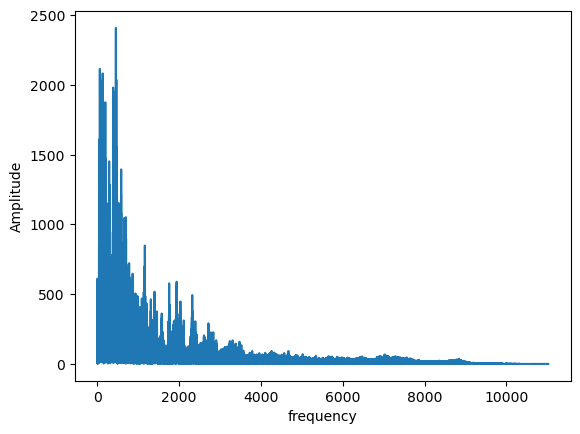

In [31]:
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.show()

This code demonstrates how to perform a Short-Time Fourier Transform (STFT) on an audio signal and plot its spectrogram using the `librosa` library. Here's a breakdown of what each part of the code does:

1. **STFT Parameters**:
   - `n_fft = 2048` sets the number of FFT points, which determines the frequency resolution of the spectrogram.
   - `hop_length = 512` sets the number of samples between successive frames, which determines the time resolution of the spectrogram.

2. **STFT Calculation**:
   - `stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)` computes the Short-Time Fourier Transform of the audio signal. The result is a complex matrix where the rows correspond to frequencies and the columns correspond to time frames.

3. **Spectrogram Calculation**:
   - `spectrogram = np.abs(stft)` calculates the magnitude of the STFT, which represents the spectrogram of the signal.
   - `log_spectrogram = librosa.amplitude_to_db(spectrogram)` converts the amplitude values of the spectrogram to decibels, which is a more perceptually relevant scale.

4. **Plotting the Spectrogram**:
   - `librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)` plots the spectrogram with the y-axis representing frequency and the x-axis representing time.
   - `plt.xlabel("Time")` and `plt.ylabel("Frequency")` label the x-axis and y-axis respectively.
   - `plt.colorbar()` adds a color bar to the plot to indicate the amplitude levels.
   - `plt.show()` displays the plot.

Overall, this code demonstrates how to analyze the time-varying frequency content of an audio signal using the STFT and visualize it as a spectrogram.


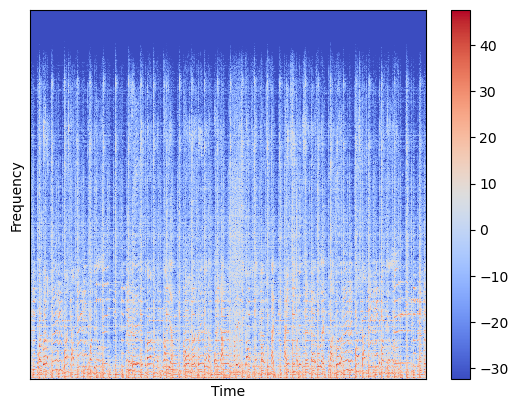

In [32]:
# stft -> spectrogram
n_fft = 2048
hop_length = 512
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

This code demonstrates how to extract Mel-Frequency Cepstral Coefficients (MFCCs) from an audio signal and plot them using the `librosa` library. Here's a breakdown of what each part of the code does:

1. **MFCC Extraction**:
   - `MFCCs = librosa.feature.mfcc(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)` extracts the MFCCs from the audio signal. The parameters `n_fft` and `hop_length` are used for the STFT calculation, and `n_mfcc=13` specifies the number of MFCCs to compute.

2. **Plotting the MFCCs**:
   - `librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)` plots the MFCCs as a spectrogram-like image, where the y-axis represents the MFCC coefficients and the x-axis represents time.
   - `plt.xlabel("Time")` and `plt.ylabel("MFCC coefficients")` label the x-axis and y-axis respectively.
   - `plt.colorbar()` adds a color bar to the plot to indicate the amplitude levels of the MFCCs.
   - `plt.title("MFCCs")` adds a title to the plot.
   - `plt.show()` displays the plot.

Overall, this code demonstrates how to extract and visualize MFCCs, which are commonly used features for speech and audio analysis.


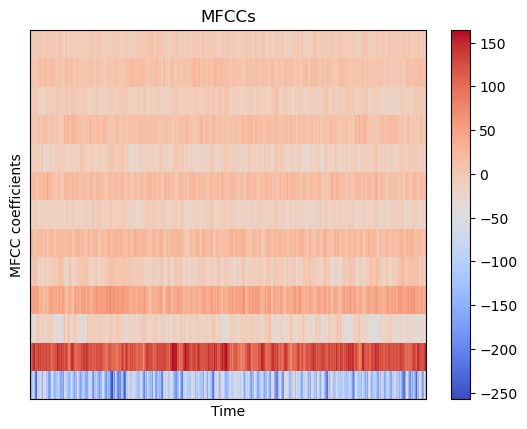

In [33]:
#MFCCs
# MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()